# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [1]:
import tensorflow as tf

## Get the dataset

In [2]:
# Import the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [4]:
# Pre processing 
X_train = X_train / 255.0
X_test = X_test / 255.0

## Visualize the dataset
Print some images with labels.

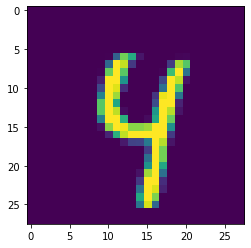

4


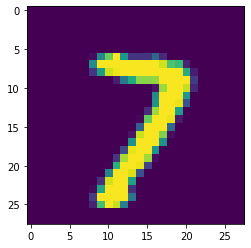

7


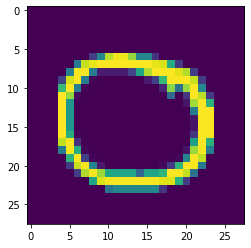

0


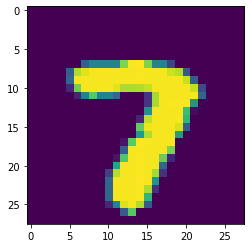

7


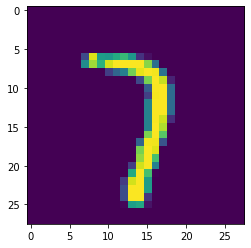

7


In [5]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_train[i])
    plt.show()
    print(Y_train[i])
    

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [6]:
import numpy as np

nums = np.zeros(10, dtype='int')
for i in Y_train:
    nums[i] += 1

print(nums)

[772 912 843 812 776 723 771 824 768 799]


## Model

In [7]:
# model building
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']


In [8]:
# Compile the model (add optimizers and metrics)
model.compile(loss=loss, optimizer=optim, metrics=metrics)

# Fit the model on the training data (specify validation_split, read about validation if new to you)
model.fit(X_train, Y_train, epochs=10, shuffle=True, verbose=2)

prob_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

model.evaluate(X_test, Y_test, verbose=2)

Epoch 1/10
250/250 - 3s - loss: 0.5477 - accuracy: 0.8438 - 3s/epoch - 12ms/step
Epoch 2/10
250/250 - 0s - loss: 0.2456 - accuracy: 0.9271 - 429ms/epoch - 2ms/step
Epoch 3/10
250/250 - 0s - loss: 0.1723 - accuracy: 0.9511 - 417ms/epoch - 2ms/step
Epoch 4/10
250/250 - 0s - loss: 0.1300 - accuracy: 0.9629 - 415ms/epoch - 2ms/step
Epoch 5/10
250/250 - 0s - loss: 0.0995 - accuracy: 0.9711 - 418ms/epoch - 2ms/step
Epoch 6/10
250/250 - 0s - loss: 0.0739 - accuracy: 0.9810 - 426ms/epoch - 2ms/step
Epoch 7/10
250/250 - 0s - loss: 0.0559 - accuracy: 0.9864 - 416ms/epoch - 2ms/step
Epoch 8/10
250/250 - 0s - loss: 0.0444 - accuracy: 0.9909 - 424ms/epoch - 2ms/step
Epoch 9/10
250/250 - 0s - loss: 0.0330 - accuracy: 0.9941 - 428ms/epoch - 2ms/step
Epoch 10/10
250/250 - 0s - loss: 0.0250 - accuracy: 0.9969 - 409ms/epoch - 2ms/step
63/63 - 0s - loss: 0.1523 - accuracy: 0.9500 - 286ms/epoch - 5ms/step


[0.1522577553987503, 0.949999988079071]

## Predict some images
Print the image along with its label (true value) and predicted value.

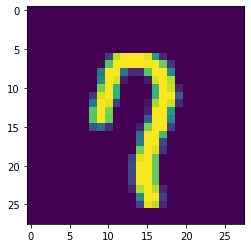

Predicted: 7 Actual: 7


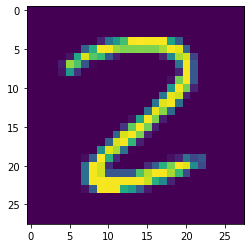

Predicted: 2 Actual: 2


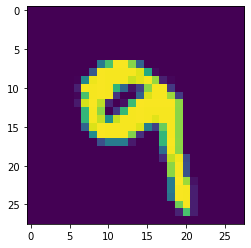

Predicted: 9 Actual: 9


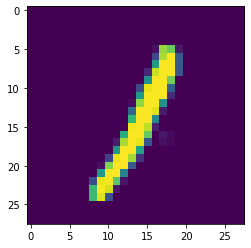

Predicted: 1 Actual: 1


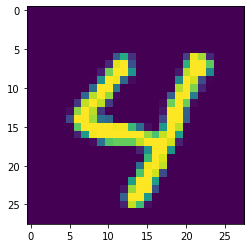

Predicted: 4 Actual: 4


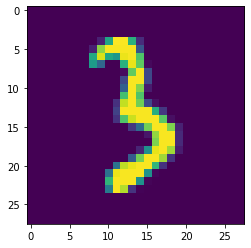

Predicted: 3 Actual: 3


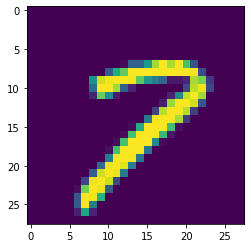

Predicted: 7 Actual: 7


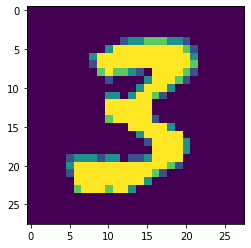

Predicted: 3 Actual: 3


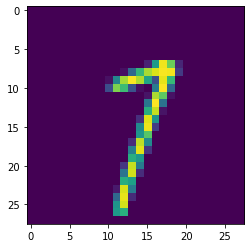

Predicted: 7 Actual: 7


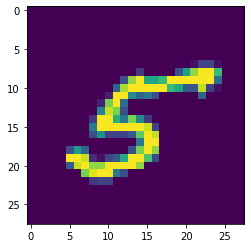

Predicted: 5 Actual: 5


In [9]:
y_pred = prob_model(X_test)
y_pred = np.argmax(y_pred, axis=1)

for i in range(10):
    plt.imshow(X_test[i])
    plt.show()
    print('Predicted:', y_pred[i], 'Actual:', Y_test[i])